In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

image = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)

points = cv2.findNonZero(image)
data=points[:, 0, :]

These lines of code basically imports the required libraries
cv2: I used cv2 to read the image and detect the white points in image
matplotlib.pyplot: This was used to plot data in the graph format 
numpy: Numpy was used to deal with arrays as images are stored as arrays 
Pandas: Pandas was used to represent the data of the distances in the form of a table
The function cv2.findNonZero basically detects the pixels which are not zero. Black is represented as (0,0,0) and white is represented as (255,255,255). Since the images provided were black and white, the white dots are detected since it is not 0 using this function
data=points[:,0,:] performs slicing and captures the x and y coordinates of the white dots. 


In [66]:
def kmean(data,centroids,k):
    
    iteration=1000
    
    for _ in range(iteration):
        clusters = [[] for _ in range(k)]
        for point in data:
            dist=np.sqrt(((point[0] - centroids[:,0])**2) + ((point[1] - centroids[:,1])**2))
            near=np.argmin(dist)
            clusters[near].append(point)
        for i in range(k):
            if clusters[i]:  
                centroids[i] = np.mean(clusters[i], axis=0)
    return centroids, clusters

This is the function which performs the K-means clustering. Clustering is basically an iterative process. 
In each iteration ‘k’ number of lists are created. For each point in the graph, distance to each centroid is calculated and is separated to append into the cluster list. After each iteration, centroid is updated to the average point among the cluster. 
The function then returns k number of clusters along with their centroids. 


In [67]:
def silhoutte(data,clusters,k):
    scores=[]
    for i in range(len(data)):
        present_cluster=-1
        for each in range(k):
            if tuple(data[i]) in map(tuple,clusters[each]):
                present_cluster=each
                break
            
        cluster_points=clusters[present_cluster]
        ai=0.0
        distances=[]
        for dot in cluster_points:
            distance = np.sqrt((data[i][0] - dot[0]) ** 2 + (data[i][1] - dot[1]) ** 2)
            ai+=distance  
        ai/=len(cluster_points)
    
        bi=float('inf')
        for other in range(k):
            if other!=present_cluster:
                other_points=clusters[other]
                for p in other_points:
                    bi_new = np.mean(np.sqrt((data[i][0] - p[0]) ** 2 + (data[i][1] - p[1]) ** 2))
                    if bi_new<bi:
                        bi=bi_new
                    
        sil_score=(bi-ai)/max(ai,bi)
        scores.append(sil_score)
    
    return np.mean(scores)

This is the function to find the silhouette score for a particular value of k. It uses two values; ai and bi. 
ai: the average distance of a point to all other points in the particular cluster
bi: the minimum average distance from the current point to any other cluster. 
Silhouette score is the difference of ai and bi divided by the maximum value among them.


In [68]:
scores=[]
k_range=[2,3,4,5,6,7,8,9,10]
max_score=0
k_best=0
for k in k_range:

    centroids=data[np.random.choice(len(data),k)]
    centroids, clusters = kmean(data, centroids, k)
    score=silhoutte(data,clusters,k)
    scores.append(score)
    if score>max_score:
        max_score=score
        k_best=k
print(k_best)

3


Initializes a list named scores to collect the silhouette scores. 
Choses 3 random among the found out points. 
The best k is the k which gives the highest silhouette score.


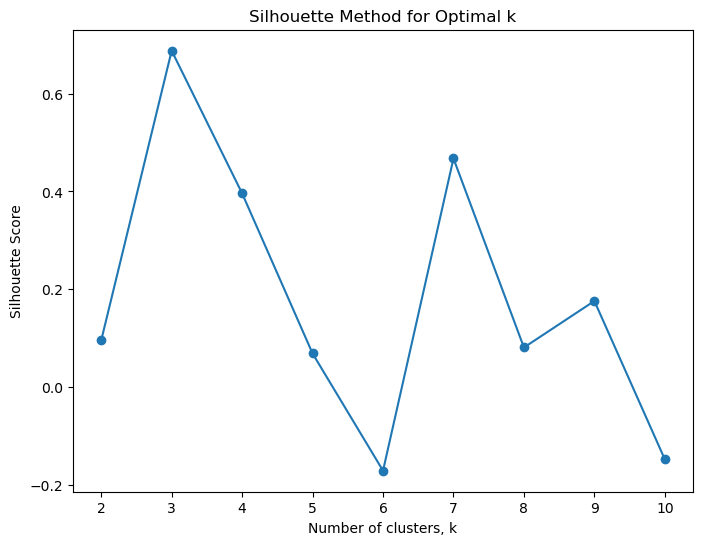

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(k_range,scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.show()

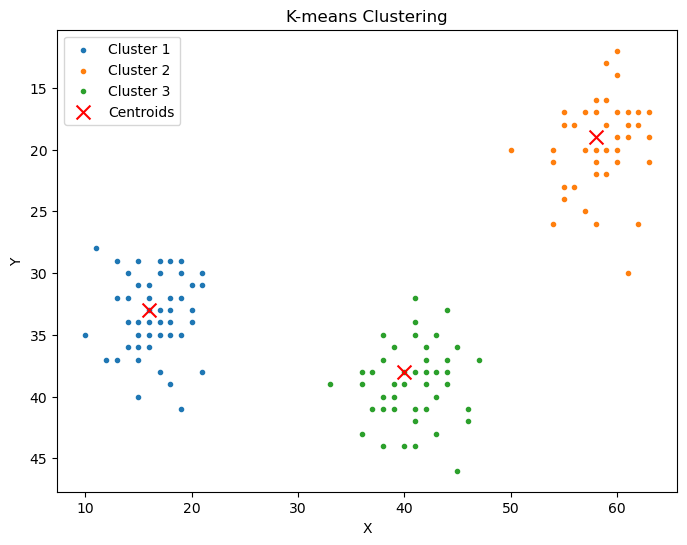

In [70]:
centroids = data[np.random.choice(len(data), k_best, replace=False)]    
centroids, clusters = kmean(data, centroids,k_best)



plt.figure(figsize=(8, 6))
for i in range(k_best):
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.gca().invert_yaxis()  
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [71]:
distances = []
for i in range(k_best):
    for j in range(i+1,k_best):
        distance=np.sqrt((centroids[i][0]-centroids[j][0])**2+(centroids[i][1]-centroids[j][1])**2)
        distances.append([f"Distance between cluster {i+1} and cluster {j+1}", distance])
        
table= pd.DataFrame(distances, columns=["Clusters", "Distance"])
print(table)

                                   Clusters   Distance
0  Distance between cluster 1 and cluster 2  44.271887
1  Distance between cluster 1 and cluster 3  24.515301
2  Distance between cluster 2 and cluster 3  26.172505


These lines of code calculate the distances between clusters and plot them in a table using Pandas. 
